# overfiting

In [2]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12333333333333334
                : 10. 正答率(テスト) = 0.1167
Generation: 20. 正答率(トレーニング) = 0.16333333333333333
                : 20. 正答率(テスト) = 0.1423
Generation: 30. 正答率(トレーニング) = 0.24666666666666667
                : 30. 正答率(テスト) = 0.1995
Generation: 40. 正答率(トレーニング) = 0.35333333333333333
                : 40. 正答率(テスト) = 0.2631
Generation: 50. 正答率(トレーニング) = 0.4066666666666667
                : 50. 正答率(テスト) = 0.3023
Generation: 60. 正答率(トレーニング) = 0.48333333333333334
                : 60. 正答率(テスト) = 0.3495
Generation: 70. 正答率(トレーニング) = 0.56
                : 70. 正答率(テスト) = 0.3834
Generation: 80. 正答率(トレーニング) = 0.61
                : 80. 正答率(テスト) = 0.4168
Generation: 90. 正答率(トレーニング) = 0.6466666666666666
                : 90. 正答率(テスト) = 0.4487
Generation: 100. 正答率(トレーニング) = 0.6933333333333334
                : 100. 正答率(テスト) = 0.4762
Generation: 110. 正答率(トレーニング) = 0.74
                : 110. 正答率(テスト) = 0.5187
Generation: 120. 正答率(トレーニング) = 0.77333333333

<Figure size 640x480 with 1 Axes>

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.1133
Generation: 20. 正答率(トレーニング) = 0.17666666666666667
                : 20. 正答率(テスト) = 0.151
Generation: 30. 正答率(トレーニング) = 0.2833333333333333
                : 30. 正答率(テスト) = 0.206
Generation: 40. 正答率(トレーニング) = 0.33
                : 40. 正答率(テスト) = 0.2475
Generation: 50. 正答率(トレーニング) = 0.41333333333333333
                : 50. 正答率(テスト) = 0.2872
Generation: 60. 正答率(トレーニング) = 0.45
                : 60. 正答率(テスト) = 0.3224
Generation: 70. 正答率(トレーニング) = 0.49333333333333335
                : 70. 正答率(テスト) = 0.3491
Generation: 80. 正答率(トレーニング) = 0.52
                : 80. 正答率(テスト) = 0.3706
Generation: 90. 正答率(トレーニング) = 0.5466666666666666
                : 90. 正答率(テスト) = 0.3983
Generation: 100. 正答率(トレーニング) = 0.58
                : 100. 正答率(テスト) = 0.419
Generation: 110. 正答率(トレーニング) = 0.61
                : 110. 正答率(テスト) = 0.4418
Generation: 120. 正答率(トレーニング) = 0.6
                : 120. 正答率(テスト) = 0.4453
Generation: 130

Generation: 970. 正答率(トレーニング) = 0.8833333333333333
                : 970. 正答率(テスト) = 0.6838
Generation: 980. 正答率(トレーニング) = 0.8733333333333333
                : 980. 正答率(テスト) = 0.6938
Generation: 990. 正答率(トレーニング) = 0.8733333333333333
                : 990. 正答率(テスト) = 0.6967
Generation: 1000. 正答率(トレーニング) = 0.8766666666666667
                : 1000. 正答率(テスト) = 0.6882


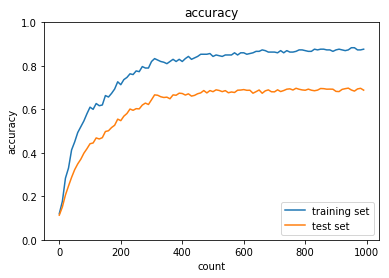

In [3]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.4
                : 10. 正答率(テスト) = 0.3169
Generation: 20. 正答率(トレーニング) = 0.5333333333333333
                : 20. 正答率(テスト) = 0.4055
Generation: 30. 正答率(トレーニング) = 0.6933333333333334
                : 30. 正答率(テスト) = 0.5687
Generation: 40. 正答率(トレーニング) = 0.8566666666666667
                : 40. 正答率(テスト) = 0.663
Generation: 50. 正答率(トレーニング) = 0.8633333333333333
                : 50. 正答率(テスト) = 0.6831
Generation: 60. 正答率(トレーニング) = 0.9
                : 60. 正答率(テスト) = 0.7146
Generation: 70. 正答率(トレーニング) = 0.8433333333333334
                : 70. 正答率(テスト) = 0.63
Generation: 80. 正答率(トレーニング) = 0.8533333333333334
                : 80. 正答率(テスト) = 0.686
Generation: 90. 正答率(トレーニング) = 0.62
                : 90. 正答率(テスト) = 0.4938
Generation: 100. 正答率(トレーニング) = 0.6366666666666667
                : 100. 正答率(テスト) = 0.4514
Generation: 110. 正答率(トレーニング) = 0.76
                : 110. 正答率(テスト) = 0.5751
Generation: 120. 正答率(トレーニング) = 0.6766666666666666
                : 1

Generation: 960. 正答率(トレーニング) = 0.92
                : 960. 正答率(テスト) = 0.697
Generation: 970. 正答率(トレーニング) = 0.9066666666666666
                : 970. 正答率(テスト) = 0.6936
Generation: 980. 正答率(トレーニング) = 0.8733333333333333
                : 980. 正答率(テスト) = 0.663
Generation: 990. 正答率(トレーニング) = 0.9166666666666666
                : 990. 正答率(テスト) = 0.7096
Generation: 1000. 正答率(トレーニング) = 0.3333333333333333
                : 1000. 正答率(テスト) = 0.3041


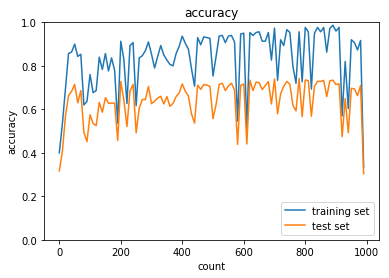

In [47]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

## Dropout

In [27]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.06333333333333334
                : 10. 正答率(テスト) = 0.0833
Generation: 20. 正答率(トレーニング) = 0.07666666666666666
                : 20. 正答率(テスト) = 0.0988
Generation: 30. 正答率(トレーニング) = 0.09
                : 30. 正答率(テスト) = 0.1102
Generation: 40. 正答率(トレーニング) = 0.12
                : 40. 正答率(テスト) = 0.1206
Generation: 50. 正答率(トレーニング) = 0.15333333333333332
                : 50. 正答率(テスト) = 0.1426
Generation: 60. 正答率(トレーニング) = 0.20333333333333334
                : 60. 正答率(テスト) = 0.1642
Generation: 70. 正答率(トレーニング) = 0.22666666666666666
                : 70. 正答率(テスト) = 0.1821
Generation: 80. 正答率(トレーニング) = 0.25
                : 80. 正答率(テスト) = 0.1974
Generation: 90. 正答率(トレーニング) = 0.2633333333333333
                : 90. 正答率(テスト) = 0.2105
Generation: 100. 正答率(トレーニング) = 0.27666666666666667
                : 100. 正答率(テスト) = 0.2131
Generation: 110. 正答率(トレーニング) = 0.27
                : 110. 正答率(テスト) = 0.2106
Generation: 120. 正答率(トレーニング) = 0.2833333333333333
       

Generation: 950. 正答率(トレーニング) = 0.87
                : 950. 正答率(テスト) = 0.653
Generation: 960. 正答率(トレーニング) = 0.8733333333333333
                : 960. 正答率(テスト) = 0.6588
Generation: 970. 正答率(トレーニング) = 0.8766666666666667
                : 970. 正答率(テスト) = 0.6576
Generation: 980. 正答率(トレーニング) = 0.87
                : 980. 正答率(テスト) = 0.6641
Generation: 990. 正答率(トレーニング) = 0.88
                : 990. 正答率(テスト) = 0.658
Generation: 1000. 正答率(トレーニング) = 0.87
                : 1000. 正答率(テスト) = 0.6571


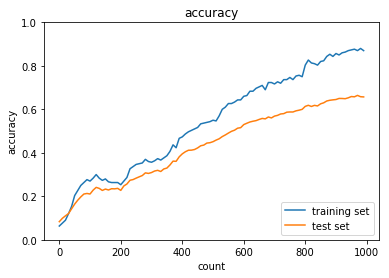

In [69]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.18
                : 10. 正答率(テスト) = 0.1534
Generation: 20. 正答率(トレーニング) = 0.22
                : 20. 正答率(テスト) = 0.1951
Generation: 30. 正答率(トレーニング) = 0.29
                : 30. 正答率(テスト) = 0.2336
Generation: 40. 正答率(トレーニング) = 0.37666666666666665
                : 40. 正答率(テスト) = 0.2847
Generation: 50. 正答率(トレーニング) = 0.42333333333333334
                : 50. 正答率(テスト) = 0.3236
Generation: 60. 正答率(トレーニング) = 0.4266666666666667
                : 60. 正答率(テスト) = 0.3267
Generation: 70. 正答率(トレーニング) = 0.48
                : 70. 正答率(テスト) = 0.3603
Generation: 80. 正答率(トレーニング) = 0.5133333333333333
                : 80. 正答率(テスト) = 0.3868
Generation: 90. 正答率(トレーニング) = 0.52
                : 90. 正答率(テスト) = 0.4088
Generation: 100. 正答率(トレーニング) = 0.55
                : 100. 正答率(テスト) = 0.4323
Generation: 110. 正答率(トレーニング) = 0.5433333333333333
                : 110. 正答率(テスト) = 0.4277
Generation: 120. 正答率(トレーニング) = 0.5766666666666667
                : 120. 正答率(テスト) = 0.446

Generation: 960. 正答率(トレーニング) = 0.9433333333333334
                : 960. 正答率(テスト) = 0.7453
Generation: 970. 正答率(トレーニング) = 0.9433333333333334
                : 970. 正答率(テスト) = 0.7515
Generation: 980. 正答率(トレーニング) = 0.9433333333333334
                : 980. 正答率(テスト) = 0.7512
Generation: 990. 正答率(トレーニング) = 0.9466666666666667
                : 990. 正答率(テスト) = 0.7497
Generation: 1000. 正答率(トレーニング) = 0.94
                : 1000. 正答率(テスト) = 0.7511


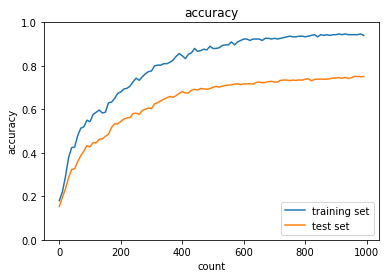

In [58]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()